In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# 关键：使用Windows自带的中文字体（确保存在）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]  # 宋体、黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ======================
# 1. 数据预处理
# ======================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 下载 MNIST 数据
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 取部分数据（t-SNE 计算量大）
subset_size = 20000
train_subset = torch.utils.data.Subset(train_dataset, range(subset_size))
train_loader = DataLoader(train_subset, batch_size=subset_size, shuffle=False)

# ======================
# 2. 获取数据与标签
# ======================
images, labels = next(iter(train_loader))
X = images.view(subset_size, -1).numpy()  # (3000, 784)
y = labels.numpy()

In [3]:
# ======================
# 3. t-SNE降维
# ======================
print("正在执行 t-SNE 降维，请稍等（可能需要1~2分钟）...")

tsne_2d = TSNE(n_components=2, learning_rate=200, perplexity=30, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X)

tsne_3d = TSNE(n_components=3, learning_rate=200, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

print("t-SNE 降维完成！")

正在执行 t-SNE 降维，请稍等（可能需要1~2分钟）...
t-SNE 降维完成！


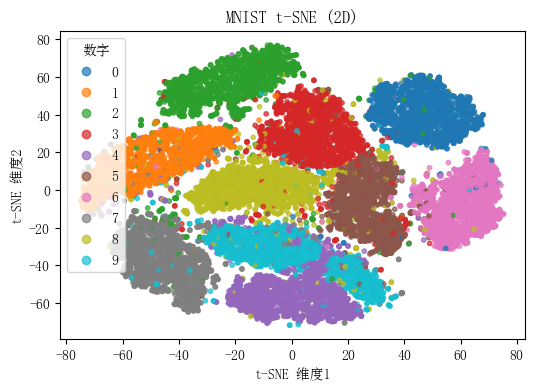

In [4]:
# ======================
# 4. 可视化
# ======================

# (1) 2D 可视化
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='tab10', alpha=0.7, s=10)
plt.legend(*scatter.legend_elements(), title="数字")
plt.title("MNIST t-SNE (2D)")
plt.xlabel("t-SNE 维度1")
plt.ylabel("t-SNE 维度2")
plt.show()


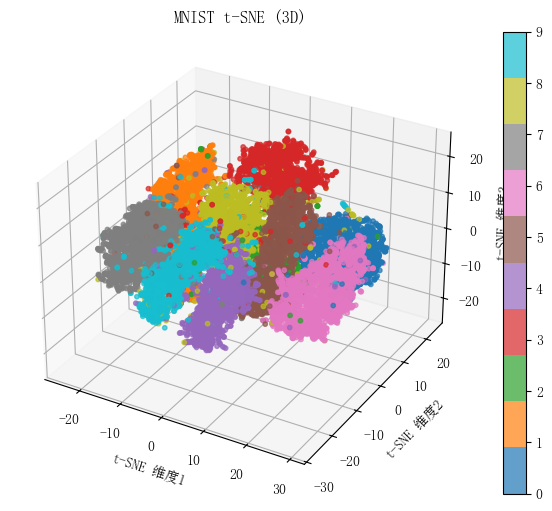

In [5]:
# (2) 3D 可视化
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='tab10', alpha=0.7, s=10)
fig.colorbar(p)
ax.set_title("MNIST t-SNE (3D)")
ax.set_xlabel("t-SNE 维度1")
ax.set_ylabel("t-SNE 维度2")
ax.set_zlabel("t-SNE 维度3")
plt.show()